In [1]:
import keras
from keras.applications.mobilenet import MobileNet
from keras.layers import Dense, Input, Dropout
from keras.models import Model

mobile=keras.applications.mobilenet.MobileNet()
mobile.summary()

Using TensorFlow backend.


Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [2]:
x=mobile.layers[-6].output
predictions=Dense(2,activation='softmax')(x)
model=Model(inputs=mobile.input,outputs=predictions)

In [3]:
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

In [4]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [6]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=50,callbacks=[checkpoint],validation_split=0.2)

Train on 431 samples, validate on 108 samples
Epoch 1/50
431/431 [==============================] - 384s 890ms/step - loss: 0.3553 - accuracy: 0.8608 - val_loss: 0.2772 - val_accuracy: 0.9167
Epoch 2/50
431/431 [==============================] - 197s 458ms/step - loss: 0.1585 - accuracy: 0.9722 - val_loss: 0.3542 - val_accuracy: 0.9444
Epoch 3/50
431/431 [==============================] - 220s 510ms/step - loss: 0.0226 - accuracy: 0.9907 - val_loss: 1.5882 - val_accuracy: 0.7407
Epoch 4/50
431/431 [==============================] - 264s 613ms/step - loss: 0.0570 - accuracy: 0.9861 - val_loss: 0.5342 - val_accuracy: 0.8981
Epoch 5/50
431/431 [==============================] - 480s 1s/step - loss: 0.0174 - accuracy: 0.9954 - val_loss: 0.1283 - val_accuracy: 0.9537
Epoch 6/50
431/431 [==============================] - 404s 937ms/step - loss: 0.0286 - accuracy: 0.9884 - val_loss: 0.1520 - val_accuracy: 0.9815
Epoch 7/50
431/431 [==============================] - 396s 919ms/step - loss: 0.0

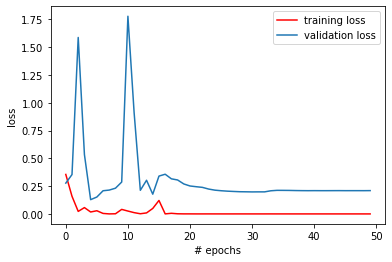

In [7]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

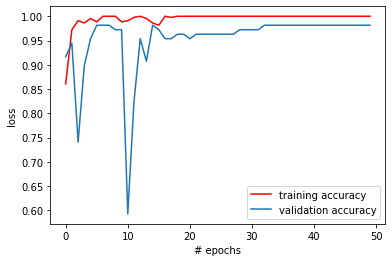

In [8]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
print(model.evaluate(test_data,test_target))

60/60 [==============================] - 8s 131ms/step
[0.3198916102599469, 0.9666666388511658]
